<table>
<tr><td><img style="height: 150px;" src="images/geo_hydro1.jpg"></td>
<td bgcolor="#FFFFFF">
    <p style="font-size: xx-large; font-weight: 900; line-height: 100%">AG Dynamics of the Earth</p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);">Jupyter notebooks</p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);">Georg Kaufmann</p>
    </td>
</tr>
</table>

# Ice-age dynamics: 6. Earth Orbit
## Orbits
----
*Georg Kaufmann,
Geophysics Section,
Institute of Geological Sciences,
Freie Universität Berlin,
Germany*

In this notebook, we discuss simple **orbit relations**, and discuss possible trjectories of planets
and moons, using `python`.

We first initialize the `python` libraries.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import ipywidgets as widgets

----
## Elliptical orbit

First, we create an array of points on a unit sphere, the **orbit**:

In [2]:
# discretisation
t = np.linspace(0,2*np.pi,51)

Next, we define the variable geometry of an **ellipse** as a function of the eccentricity $e$:

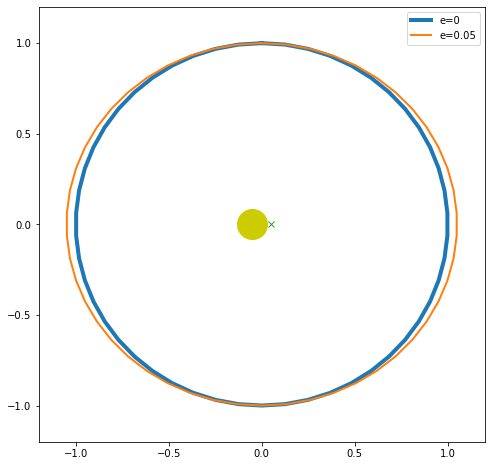

In [3]:
def plot_ellipse(e):
    """
    function creates circle and ellipse and plot it
    """
    # circle
    ycircle = np.cos(t)
    xcircle = np.sin(t)

    a=1.0; b=a*(1+e)
    # ellipsoid
    yellipse = a*np.cos(t)
    xellipse = b*np.sin(t)
    # plot
    plt.figure(figsize=(8,8))
    plt.xlim([-1.2,1.2])
    plt.ylim([-1.2,1.2])
    plt.plot(xcircle,ycircle,lw=4,label='e=0')
    plt.plot(xellipse,yellipse,lw=2,label='e='+str(e))
    plt.plot(-e,0,lw=0,marker='o',color=(0.8,0.8,0.0),markersize=30)
    plt.plot(+e,0,lw=0,marker='x')
    plt.legend()
    
plot_ellipse(0.05)

In [4]:
# call interactive module
w = dict(
e=widgets.FloatSlider(min=0,max=0.20,step=0.01,value=0.05,description='Eccentricity'))

output = widgets.interactive_output(plot_ellipse, w)
box = widgets.VBox([widgets.HBox([*w.values()]), output])
display(box)

Plot the ellipse in 3D:

<IPython.core.display.Javascript object>


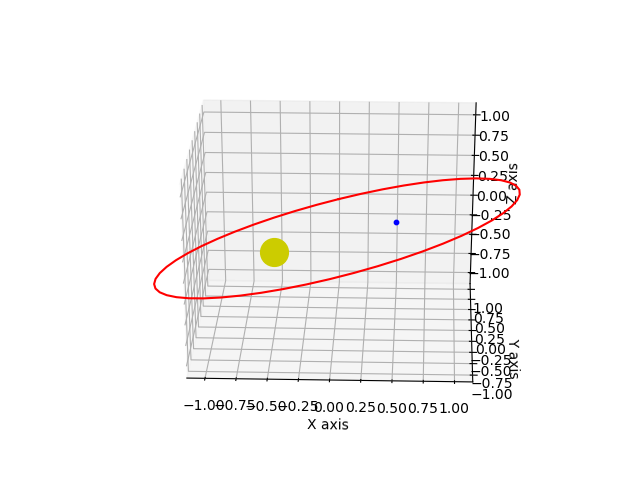

In [5]:
%matplotlib notebook
# discretisation
t = np.linspace(0,2*np.pi,51)
# inclination of orbit
inc=15.
# eccentricity of orbit
e=0.5
# major and minor axes of ellipsoid
a=1.0; b=a*(1+e)
# coordinate arrays
yellipse = a*np.cos(t)
xellipse = b*np.sin(t)
zellipse = xellipse.max()*np.arctan(inc*np.pi/180.)*xellipse
# plot
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot3D(xellipse, yellipse, zellipse, 'red')
ax.scatter3D(-e,0,-xellipse.max()*np.arctan(inc*np.pi/180.)*e,color=(0.8,0.8,0.0),s=400)
ax.scatter3D(+e,0,+xellipse.max()*np.arctan(inc*np.pi/180.)*e,color=(0.0,0.0,1.0),s=10)
ax.set_xlim([-1.1,1.1])
ax.set_ylim([-1.1,1.1])
ax.set_zlim([-1.1,1.1])
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis');

----
## Different orbits

Finally, we plot different geometrical curves representing orbits.

/opt/local/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in true_divide
/opt/local/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in multiply


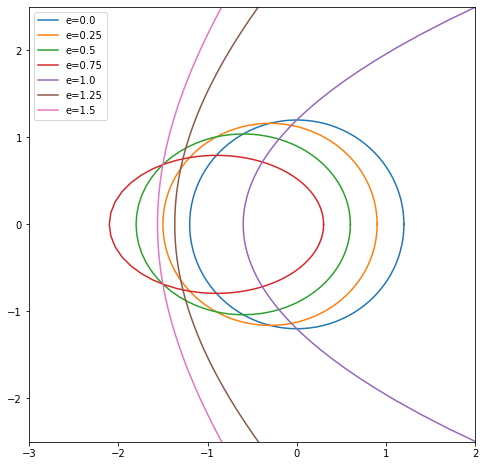

In [7]:
%matplotlib inline
# define major axis
a = 1.2
# initialize figure
plt.figure(figsize=(8,8))
plt.xlim([-3,2])
plt.ylim([-2.5,2.5])
# circle and ellipse
for e in np.linspace(0.0,0.75,4):
    t = np.linspace(0,2*np.pi,101)
    p=a*(1-e**2)
    r=p/(1+e*np.cos(t))
    x = r*np.cos(t)
    y = r*np.sin(t)
    plt.plot(x,y,label='e='+str(e))
# parabola
t = np.linspace(0,2*np.pi,101)
e = 1.
p=a
r=p/(1-e*np.cos(t))
x = r*np.cos(t)
y = r*np.sin(t)
plt.plot(x,y,label='e='+str(e))
# hyperbolas
for e in np.linspace(1.25,1.5,2):
    t = np.linspace(np.pi/2,3*np.pi/2,101)
    p=a*(1+e**2)
    r=p/(1-e*np.cos(t))
    x = r*np.cos(t)
    y = r*np.sin(t)
    plt.plot(x,y,label='e='+str(e))

plt.legend()   
plt.savefig('figures/cone_sections.png',dpi=300)

... done